# Where to live when you first move to London?   A data analysis approach

## Introduction

As part of the final capstone project for IBM Data Science Professional Certification in Coursera.  
I decided to write a post where I will share the different methods used to answer the problem: Where to live when you first move to London?  
In this project I will only focus on rent price and nearby venues.  

## Problem

“Where to live when you first move in London?”  

London is a global city, known worldwide as one the great cities to visit, and often regarded as the best place to start a career.

As a result,every year many young professionals decide to move to London on a whim and the only decision to make, is where to live.  

However when people move without planning it carefully, they regret having chosen a specific area for renting.  
Thus, they want to move again but finding out somewhere to live can become difficult if we don't have the right information.

In this project I'll attempt to gather different information such as venues by area as well as renting price by area and combined them with the aim of clustering the London's districts based on their venues and renting price.

I decided to keep this project simple as I want to finish this project on time while ensuring to implement all parts learnt throughout the course.  
But to make the problem more complex we could've added more variables such as school rate, crime rate, surgeries rating...


<!-- wp:heading -->
<h2>Methodology</h2>
<!-- /wp:heading -->

<!-- wp:heading {"level":3} -->
<h3>Data Collection: Web scraping</h3>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p>In order to retrieve data about venues and renting price I will use the Foursquare API and the Findproperly website.  <br/>
I will need to write some <a href="https://en.wikipedia.org/wiki/Data_scraping">data scraping</a> scripts using python.</p>
<!-- /wp:paragraph -->

<!-- wp:heading {"level":3} -->
<h3>Data preprocessing</h3>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p>Using the numpy and pandas libraries I will clean, transorm and merge the different datasets together.</p>
<!-- /wp:paragraph -->

<!-- wp:heading {"level":3} -->
<h3>Data Exploration</h3>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p>Using matplotlib, seaborn and folium libraries I will explore the data and try to extract some interesting insights.</p>
<!-- /wp:paragraph -->

<!-- wp:heading -->
<h2>Clustering</h2>
<!-- /wp:heading -->

<!-- wp:paragraph -->
<p><a href="https://en.wikipedia.org/wiki/Cluster_analysis"><strong>Clustering</strong> </a>is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.<br>In order to address our initial problem I will apply a clustering algorithm on the the extracted data and try to cluster the different areas of London according to their type of venues, rent, number of parks and so on.</p>
<!-- /wp:paragraph -->

## Data Collection

In [3]:
import numpy as np # library to handle data in a vectorized manner
import os
import sys
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder as geocoder
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import lxml.html as lh
from bs4 import BeautifulSoup

import wikipedia as wp

print('Libraries imported.')

Libraries imported.


### Web Scrapping & Data Cleansing

#### Renting Price from FindProperly

In [4]:
df_house=pd.read_csv("df_house.csv")

In [5]:
#obtained from findproperly 
df_house.head()

District Neighborhood Areas  weekly_rent_1  weekly_rent_2  weekly_rent_3  \
0      BR1      Bromley   NaN            221            300            348   
1      BR2      Bromley   NaN            227            304            391   
2      BR3      Bromley   NaN            223            315            376   
3      BR4      Bromley   NaN            237            265            409   
4      BR5      Bromley   NaN            167            263            318   

   weekly_rent_4  sales_1  sales_2  sales_3  sales_4  
0            432      264      366      431    751.0  
1            629      231      367      520    603.0  
2            485      271      364      494    677.0  
3            508      147      353      592    734.0  
4            438      216      308      377    673.0

#### Map Latitude and Longitude to Postcode

In [6]:
df_house['latitude']=""
df_house['longitude']=""
geolocator = Nominatim(user_agent="ny_explorer")    

In [7]:

for i, row in df_house.iterrows():
    #if (df_house.at[i,'latitude']=="" and df_house.at[i,'longitude']==""):
        try:        
            search_query = '{}, London,UK'.format(df_house['District'].iloc[i])
            latlong = geocoder.arcgis(search_query).latlng
            df_house.at[i,'latitude'] =latlong[0]
            df_house.at[i,'longitude'] =latlong[1]
        except Exception:
            pass

In [8]:
df_house.head()

District Neighborhood Areas  weekly_rent_1  weekly_rent_2  weekly_rent_3  \
0      BR1      Bromley   NaN            221            300            348   
1      BR2      Bromley   NaN            227            304            391   
2      BR3      Bromley   NaN            223            315            376   
3      BR4      Bromley   NaN            237            265            409   
4      BR5      Bromley   NaN            167            263            318   

   weekly_rent_4  sales_1  sales_2  sales_3  sales_4 latitude   longitude  
0            432      264      366      431    751.0  51.4167  0.00904221  
1            629      231      367      520    603.0  51.5064    -0.12721  
2            485      271      364      494    677.0  51.4151  -0.0354028  
3            508      147      353      592    734.0  51.5064    -0.12721  
4            438      216      308      377    673.0  51.5064    -0.12721

In [ ]:
df_house.to_csv("df_house_latlong.csv",index=False)

#### Import File from my local folder

In [9]:
#os.getcwd()
df_house = pd.read_csv("df_house_latlong.csv",sep=",")
df_house.head()

District Neighborhood Areas  weekly_rent_1  weekly_rent_2  weekly_rent_3  \
0      BR1      Bromley   NaN            221            300            348   
1      BR2      Bromley   NaN            227            304            391   
2      BR3      Bromley   NaN            223            315            376   
3      BR4      Bromley   NaN            237            265            409   
4      BR5      Bromley   NaN            167            263            318   
5      BR6      Bromley   NaN            162            280            342   
6      BR7      Bromley   NaN            156            308            468   
7      BR8      Bromley   NaN            230            239            323   
8      CR0      Croydon   NaN            203            295            351   
9      CR2      Croydon   NaN            219            286            365   

   weekly_rent_4  sales_1  sales_2  sales_3  sales_4   latitude  longitude  
0            432      264      366      431      751  51.416710   0.009042  
1            629      231      367      520      603  51.506420  -0.127210  
2            485      271      364      494      677  51.415095  -0.035403  
3            508      147      353      592      734  51.506420  -0.127210  
4            438      216      308      377      673  51.506420  -0.127210  
5            421      244      347      482      647  51.506420  -0.127210  
6            444      251      458      507      796  51.413275   0.087473  
7            335      128      291      357      420  51.385765   0.200870  
8            443      248      325      392      491  51.384755  -0.051499  
9            435      253      296      439      607  51.506420  -0.127210

#### Unpivot the renting and selling columns

In [10]:
df_house= pd.melt(df_house, id_vars=['District','Neighborhood','Areas','latitude','longitude'], value_vars=['weekly_rent_1', 'weekly_rent_2', 'weekly_rent_3','weekly_rent_4','sales_1','sales_2','sales_3','sales_4'])


In [11]:
df_house.head()

District Neighborhood Areas   latitude  longitude       variable  value
0      BR1      Bromley   NaN  51.416710   0.009042  weekly_rent_1    221
1      BR2      Bromley   NaN  51.506420  -0.127210  weekly_rent_1    227
2      BR3      Bromley   NaN  51.415095  -0.035403  weekly_rent_1    223
3      BR4      Bromley   NaN  51.506420  -0.127210  weekly_rent_1    237
4      BR5      Bromley   NaN  51.506420  -0.127210  weekly_rent_1    167

#### Add new column type Sale or Rent

In [12]:
df_house['type']=np.where(df_house['variable'].str.contains('rent')==True    , 'Rent', 'Sale')

#### Get the last character of the column bedroom

In [13]:
df_house = df_house.rename(columns={'variable': 'bedroom'})
df_house['bedroom']=df_house['bedroom'].str[-1:]
df_house.head()

District Neighborhood Areas   latitude  longitude bedroom  value  type
0      BR1      Bromley   NaN  51.416710   0.009042       1    221  Rent
1      BR2      Bromley   NaN  51.506420  -0.127210       1    227  Rent
2      BR3      Bromley   NaN  51.415095  -0.035403       1    223  Rent
3      BR4      Bromley   NaN  51.506420  -0.127210       1    237  Rent
4      BR5      Bromley   NaN  51.506420  -0.127210       1    167  Rent

### List of areas of London

#### Scraping Wikipedia
In order to later plot our data onto a map we need to get the borough name for each postcode.  
To do so we can scrap a wikipedia page which contains the borough name related to each postcode. 

In [14]:
#Get the html source
html = wp.page("List of areas of London").html().encode("UTF-8")
df_wiki = pd.read_html(html)[1]
df_wiki.head()

Location                     London borough       Post town  \
0   Abbey Wood              Bexley, Greenwich [7]          LONDON   
1        Acton  Ealing, Hammersmith and Fulham[8]          LONDON   
2    Addington                         Croydon[8]         CROYDON   
3   Addiscombe                         Croydon[8]         CROYDON   
4  Albany Park                             Bexley  BEXLEY, SIDCUP   

  Postcode district Dial code OS grid ref  
0               SE2       020    TQ465785  
1            W3, W4       020    TQ205805  
2               CR0       020    TQ375645  
3               CR0       020    TQ345665  
4         DA5, DA14       020    TQ478728

In [15]:
df_wiki.shape

(533, 6)

In [16]:
df_wiki = df_wiki.drop(df_wiki.columns[[2,4,5]], axis=1)  # df.columns is zero-based pd.Index 

In [17]:
df_wiki.head()

Location                     London borough Postcode district
0   Abbey Wood              Bexley, Greenwich [7]               SE2
1        Acton  Ealing, Hammersmith and Fulham[8]            W3, W4
2    Addington                         Croydon[8]               CR0
3   Addiscombe                         Croydon[8]               CR0
4  Albany Park                             Bexley         DA5, DA14

#### Rename unneeded columns

In [18]:
df_wiki.columns = ['Location','London_borough','Postcode']

#### Data Cleansing

In [19]:
df_wiki['London_borough'] =  df_wiki['London_borough'].apply(lambda x: x.replace('[','').replace(']','')) 
df_wiki['Postcode'] =  df_wiki['Postcode'].apply(lambda x: x.replace('[','').replace(']','')) 
df_wiki['London_borough'] =  df_wiki['London_borough'].str.replace('\d+', '')

In [20]:
df_wiki.head()

Location                  London_borough   Postcode
0   Abbey Wood              Bexley, Greenwich         SE2
1        Acton  Ealing, Hammersmith and Fulham     W3, W4
2    Addington                         Croydon        CR0
3   Addiscombe                         Croydon        CR0
4  Albany Park                          Bexley  DA5, DA14

As we can see some location have more than one borough separated with a comma.  
So we need to split each separated with a coma and create a new row per borough.

In [21]:
#https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [22]:
df_wiki_clean=explode(df_wiki.assign(Postcode=df_wiki.Postcode.str.split(',')), 'Postcode')

In [24]:
df_wiki_clean.head()

Location                  London_borough Postcode
0  Abbey Wood              Bexley, Greenwich       SE2
1       Acton  Ealing, Hammersmith and Fulham       W3
2       Acton  Ealing, Hammersmith and Fulham       W4
3   Addington                         Croydon      CR0
4  Addiscombe                         Croydon      CR0

In [26]:
df_wiki_clean=explode(df_wiki_clean.assign(London_borough=df_wiki_clean.London_borough.str.split(',')), 'London_borough')

In [25]:
df_wiki_clean.head()

Location                  London_borough Postcode
0  Abbey Wood              Bexley, Greenwich       SE2
1       Acton  Ealing, Hammersmith and Fulham       W3
2       Acton  Ealing, Hammersmith and Fulham       W4
3   Addington                         Croydon      CR0
4  Addiscombe                         Croydon      CR0

#### Save file

In [ ]:
df_wiki_clean.to_csv("df_wiki_clean_unique.csv",index=False)

#### import file

In [28]:
df_wiki_clean = pd.read_csv("df_wiki_clean_unique.csv")
df_wiki_clean.head()

Location Postcode           London_borough
0  Abbey Wood      SE2                   Bexley
1  Abbey Wood      SE2               Greenwich 
2       Acton       W3                   Ealing
3       Acton       W3   Hammersmith and Fulham
4       Acton       W4                   Ealing

In [29]:
df_house.head()

District Neighborhood Areas   latitude  longitude bedroom  value  type
0      BR1      Bromley   NaN  51.416710   0.009042       1    221  Rent
1      BR2      Bromley   NaN  51.506420  -0.127210       1    227  Rent
2      BR3      Bromley   NaN  51.415095  -0.035403       1    223  Rent
3      BR4      Bromley   NaN  51.506420  -0.127210       1    237  Rent
4      BR5      Bromley   NaN  51.506420  -0.127210       1    167  Rent

## EDA - Exploratory Data Analysis

EDA is one of the most crucial step in data science that allows us to find insights and get a feel for the data.
Taking the time to understand the data and being thoughtful about it will help us to better pose a problem or and understand the domain.  

By performing EDA thoroughly we can quite often start to draw insight that are essential forn the business.
We can define what features will be used for our machine learning model and also perform some feature engineering. 

EDA allows us to make initial hypothesis by looking at the data even before reuning the ML model.  
So after runing our ML model EDA will help us to validate or to reject our inital assumption about the data. 

#### Renting & Selling Price by Number of Bedrooms

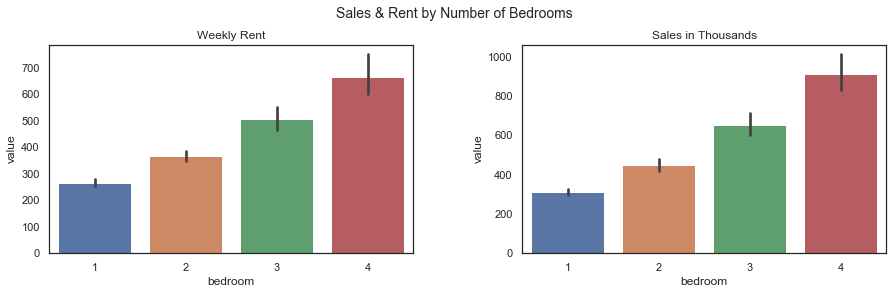

In [32]:
df_mean_rent=df_house.loc[df_house['type'] == 'Rent']
df_mean_sale=df_house.loc[df_house['type'] == 'Sale']
import seaborn as sns
fig = plt.figure(figsize=(15,4))
title = fig.suptitle("Sales & Rent by Number of Bedrooms", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Weekly Rent")
sns.set(style="white")
sns.barplot(x="bedroom", y="value", data=df_mean_rent)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Sales in Thousands")
sns.set(style="white")
sns.barplot(x="bedroom", y="value", data=df_mean_sale)

The renting and selling price seem to have a linear growth as the number of bedroom increases.

#### Renting & Selling Price Distribution

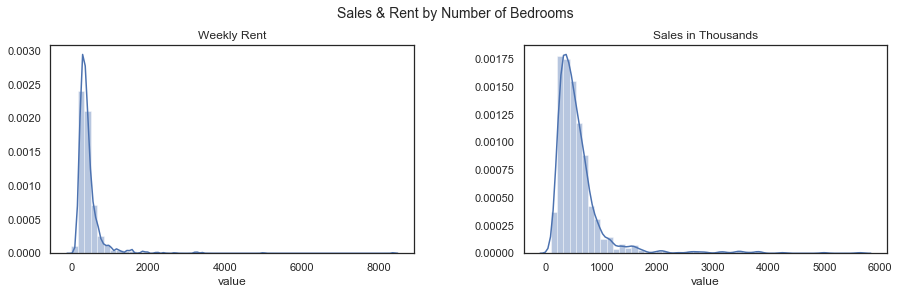

In [29]:
fig = plt.figure(figsize=(15,4))
title = fig.suptitle("Sales & Rent by Number of Bedrooms", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Weekly Rent")
sns.set(style="white")
sns.distplot(df_mean_rent['value'])

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Sales in Thousands")
sns.set(style="white")
sns.distplot(df_mean_sale['value'])


From here we can observe that the distribution of the renting and selling price are both positively skewed.  
There seem to be few outliers in the renting price as well as in the selling price.  
This is something that we need to pay attenton while building a model.  
I will use a K-means algorithm in this project and K-means clustering algorithm is actually quite sensitive to outliers, that's because k-means uses the mean and a mean can be greatly influenced by outliers.

#### Top 15 most expensive districts

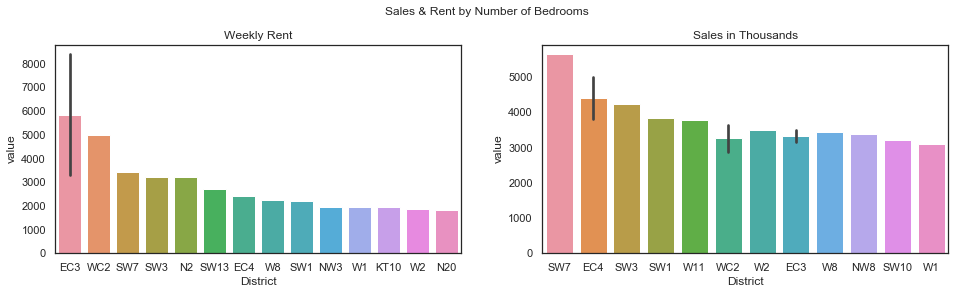

In [33]:
fig = plt.figure(figsize=(16,4))
title = fig.suptitle("Sales & Rent by Number of Bedrooms", fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.2)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Weekly Rent")
sns.set(style="white")
sns.barplot(x="District", y="value", data=df_mean_rent.nlargest(15, 'value'))

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Sales in Thousands")
sns.set(style="white")
sns.barplot(x="District", y="value", data=df_mean_sale.nlargest(15, 'value'))

This is interesting to observe that some districts are not in the top 15 most expensive area to buy while they are in the top 15 most expensive area to rent.  
Those districts could be a good place to invest. I won't go any further into this analysis as this project is about "Where to live" and not "where to invest".

In [34]:
df_mean_sale_15=df_mean_sale.nlargest(15, 'value')
df_mean_rent_15=df_mean_rent.nlargest(15, 'value')

Top 15 most expensive rent not present in top 15 most expensive sales.

In [35]:
df_mean_rent_15[~df_mean_rent_15['District'].isin(df_mean_sale_15['District'])].dropna()

District     Neighborhood          Areas  latitude  longitude bedroom  \
948       N2         Northern  East Finchley  51.58927   -0.16395       4   
769     SW13        Battersea         Barnes  51.47457   -0.24212       3   
971      NW3  North Western\t      Hampstead  51.55506   -0.17348       4   
966      N20         Northern     Totteridge  51.63261   -0.17562       4   

     value  type  
948   3228  Rent  
769   2694  Rent  
971   1962  Rent  
966   1834  Rent

Top 15 most expensive sales not present in top 15 most expensive rent.

In [36]:
df_mean_sale_15[~df_mean_sale_15['District'].isin(df_mean_rent_15['District'])].dropna()

District     Neighborhood           Areas  latitude  longitude bedroom  \
2207      W11       Paddington    Holland Park  51.51244   -0.20639       4   
2088      NW8  North Western\t  St John's Wood  51.53398   -0.17378       4   
2156     SW10  South Western\t   West Brompton  51.48563   -0.18144       4   

      value  type  
2207   3781  Sale  
2088   3391  Sale  
2156   3224  Sale

In [34]:
df_mean_rent[df_mean_rent["District"]=="SW13"]

District Neighborhood   Areas  latitude  longitude bedroom  value  type
213      SW13    Battersea  Barnes  51.47457   -0.24212       1    658  Rent
491      SW13    Battersea  Barnes  51.47457   -0.24212       2    837  Rent
769      SW13    Battersea  Barnes  51.47457   -0.24212       3   2694  Rent
1047     SW13    Battersea  Barnes  51.47457   -0.24212       4    904  Rent

### Merge London Boroughs and London Property price

In order to use the Foursquare API and choropleth map properly I need to add the London_borough from wikipedia into my dataset.  
I use an inner join as I want to get rid of the districts for those which we could't find a borough.

In [37]:
df_all=pd.merge(df_house, df_wiki_clean, how='inner', left_on='District', right_on='Postcode')

In [38]:
print(f'The shape of df_house is {df_house.shape} , the shape of df_wiki_clean is {df_wiki_clean.shape} ', \
      f'and the shape of df_all is {df_all.shape}')

The shape of df_house is (2224, 8) , the shape of df_wiki_clean is (679, 3)  and the shape of df_all is (4456, 11)


In [39]:
df_all.head()

District Neighborhood Areas  latitude  longitude bedroom  value  type  \
0      BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
1      BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
2      BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
3      BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   
4      BR1      Bromley   NaN  51.41671   0.009042       1    221  Rent   

                       Location Postcode London_borough  
0                       Bromley      BR1        Bromley  
1                       Downham      BR1       Lewisham  
2                      Plaistow      BR1        Bromley  
3                     Sundridge      BR1        Bromley  
4  Widmore (also Widmore Green)      BR1        Bromley

#### Remove unneeded columns

In [40]:
df_all = df_all.drop(df_all.columns[[0,1,2,8]], axis=1)  # df.columns is zero-based pd.Index 

In [41]:
new_order = [5, 6, 4, 2, 3, 0,1]
df_all = df_all[df_all.columns[new_order]]
df_all.head()

Postcode London_borough  type bedroom  value  latitude  longitude
0      BR1        Bromley  Rent       1    221  51.41671   0.009042
1      BR1       Lewisham  Rent       1    221  51.41671   0.009042
2      BR1        Bromley  Rent       1    221  51.41671   0.009042
3      BR1        Bromley  Rent       1    221  51.41671   0.009042
4      BR1        Bromley  Rent       1    221  51.41671   0.009042

In [42]:
df_all.shape

(4456, 7)

#### Remove duplicate rows
As sometime a district belongs to muyltiple boroughs and vice versa we've generated some duplicate rows.

In [43]:
df_all.drop_duplicates(keep="first",inplace=True)

In [44]:
df_all[df_all["Postcode"]=="BR1"]

Postcode London_borough  type bedroom  value  latitude  longitude
0       BR1        Bromley  Rent       1    221  51.41671   0.009042
1       BR1       Lewisham  Rent       1    221  51.41671   0.009042
5       BR1        Bromley  Rent       2    300  51.41671   0.009042
6       BR1       Lewisham  Rent       2    300  51.41671   0.009042
10      BR1        Bromley  Rent       3    348  51.41671   0.009042
11      BR1       Lewisham  Rent       3    348  51.41671   0.009042
15      BR1        Bromley  Rent       4    432  51.41671   0.009042
16      BR1       Lewisham  Rent       4    432  51.41671   0.009042
20      BR1        Bromley  Sale       1    264  51.41671   0.009042
21      BR1       Lewisham  Sale       1    264  51.41671   0.009042
25      BR1        Bromley  Sale       2    366  51.41671   0.009042
26      BR1       Lewisham  Sale       2    366  51.41671   0.009042
30      BR1        Bromley  Sale       3    431  51.41671   0.009042
31      BR1       Lewisham  Sale       3    431  51.41671   0.009042
35      BR1        Bromley  Sale       4    751  51.41671   0.009042
36      BR1       Lewisham  Sale       4    751  51.41671   0.009042

In [45]:
df_all.shape

(2208, 7)

#### Save file

In [46]:
df_all.to_csv("df_all.csv",index=False)

#### Read file

In [1]:
df_all = pd.read_csv("df_all.csv")
df_all.head(10)

Postcode London_borough  type  bedroom  value  latitude  longitude
0      BR1        Bromley  Rent        1    221  51.41671   0.009042
1      BR1       Lewisham  Rent        1    221  51.41671   0.009042
2      BR1        Bromley  Rent        2    300  51.41671   0.009042
3      BR1       Lewisham  Rent        2    300  51.41671   0.009042
4      BR1        Bromley  Rent        3    348  51.41671   0.009042
5      BR1       Lewisham  Rent        3    348  51.41671   0.009042
6      BR1        Bromley  Rent        4    432  51.41671   0.009042
7      BR1       Lewisham  Rent        4    432  51.41671   0.009042
8      BR1        Bromley  Sale        1    264  51.41671   0.009042
9      BR1       Lewisham  Sale        1    264  51.41671   0.009042

#### Create Renting dataframe  
As already mentioned my project only focuses on "where to live" and specifically "where to rent", so from here I will only keep the renting price variable.   
I will also take the average renting price of each bedroom.

In [47]:
df_rent=df_all.loc[df_all['type'] == 'Rent']

df_rent=df_rent[['London_borough','latitude','longitude','value']]

df_rent['avg_rent'] = df_rent.groupby(['London_borough','latitude','longitude'])['value'].transform('mean')

del df_rent['value']

If you'd like to reuse my project and go more in depth with the invest part the below code could be a good starting point.

In [ ]:
# for the version 2 "where to invest"
#df_rent=df_all.loc[df_all['type'] == 'Rent']
#df_sale=df_all.loc[df_all['type'] == 'Sale']
#df_merge=df = df_rent.merge(df_sale, on=['Postcode','London_borough','bedroom'], how='inner')

#df_rent=df_rent[['London_borough','latitude','longitude','value']]
#df_sale=df_sale[['London_borough','latitude','longitude','value']]

#df_rent['avg_rent'] = df_rent.groupby(['London_borough','latitude','longitude'])['value'].transform('mean')
#df_sale['avg_sale'] = df_sale.groupby(['London_borough','latitude','longitude'])['value'].transform('mean')

#del df_rent['value']
#del df_sale['value']




In [16]:
#df_sale=df_all.loc[df_all['type'] == 'Sale']
#df_merge=df = df_rent.merge(df_sale, on=['Postcode','London_borough','bedroom'], how='inner')

#df_merge["yield"]=df_merge['value_x']*52.25
#df_merge["yield"]=df_merge["yield"]/(df_merge["value_y"]*1000)

In [18]:
# add clustering labels
#df_rent.insert(0, 'yield', df_merge["yield"])

In [20]:
#df_rent.head()
#df_rent.to_csv("df_rent_yield.csv")

In [48]:
df_rent.drop_duplicates(inplace=True)
df_rent = df_rent.reset_index(drop=True)
df_rent.head()

London_borough   latitude  longitude  avg_rent
0        Bromley  51.416710   0.009042  325.2500
1       Lewisham  51.416710   0.009042  325.2500
2        Bromley  51.506420  -0.127210  335.0625
3        Bromley  51.415095  -0.035403  349.7500
4        Bromley  51.413275   0.087473  344.0000

#### Save file

In [49]:
df_rent.to_csv("df_rent.csv",index=False)

#### Read file 

In [50]:
#read file
df_rent = pd.read_csv("df_rent.csv")
df_rent.head(10)

London_borough   latitude  longitude    avg_rent
0        Bromley  51.416710   0.009042  325.250000
1       Lewisham  51.416710   0.009042  325.250000
2        Bromley  51.506420  -0.127210  335.062500
3        Bromley  51.415095  -0.035403  349.750000
4        Bromley  51.413275   0.087473  344.000000
5        Croydon  51.384755  -0.051499  323.000000
6        Croydon  51.506420  -0.127210  320.666667
7         Merton  51.402625  -0.143638  327.250000
8        Croydon  51.396315  -0.106608  308.250000
9         Bexley  51.452068   0.172230  294.875000

#### Visualise the London districts on Folium map

In [51]:
address = 'London, United Kingdom'
latitude = 51.5074
longitude = 0.1278
print('The coordinates of London are {}, {}.'.format(latitude, longitude))

The coordinates of London are 51.5074, 0.1278.


In [52]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_rent['latitude'], df_rent['longitude'], df_rent['London_borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

This map shows all the London's districts that I will try to cluster according to their venues and rents price.

#### Visualise the London districts with Average Rents by Area 

In [53]:
lnd_geo = r'london_small.geojson'
lnd_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

lnd_map.choropleth(
    geo_data=lnd_geo,
    data=df_rent,
    columns=['London_borough','avg_rent'],
    key_on='feature.properties.name',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average house Prices'
)

# add markers to the map
for lat, lon, poi in zip(df_rent['latitude'],df_rent['longitude'], df_rent['London_borough']):
    label = folium.Popup(str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(lnd_map)
    
    
    

    
# display map
lnd_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


The choropleth map shows all the districts and the boroughs are shaded and coloured according to the average values of their rents.

### Extract data from Foursquare

In [55]:
CLIENT_ID = 'YQBQXAXUYTA05LW3P1RT0ID0EPNIVD5M405LZEM1I43PUID1' # your Foursquare ID
CLIENT_SECRET = 'PTVQDKW5QWDPBIMH141Q2VACOVLKXASB4G4HUFTXQ5W4UUHO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YQBQXAXUYTA05LW3P1RT0ID0EPNIVD5M405LZEM1I43PUID1
CLIENT_SECRET:PTVQDKW5QWDPBIMH141Q2VACOVLKXASB4G4HUFTXQ5W4UUHO


#### function that extracts the category of the venue

In [60]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## 2. Explore Neighborhoods in London

In [61]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The above function extracts the top 100 closest venues of each district (lat, long) within 500 meters.

In [63]:
london_venues = getNearbyVenues(names=df_rent['London_borough'],
                                   latitudes=df_rent['latitude'],
                                   longitudes=df_rent['longitude']
                                    
                                  )


Bromley
Lewisham
Bromley
Bromley
Bromley
Croydon
Croydon
Merton
Croydon
Bexley
Bexley
Dartford
Bexley
 Bromley
Bexley
Bexley
Bexley
Tower Hamlets
Tower Hamlets
Hackney
Tower Hamlets
Waltham Forest
Hackney
Newham
Newham
Hackney
Hackney
Hackney
Waltham Forest
Waltham Forest
Redbridge
 Waltham Forest
Newham
Newham
Tower Hamlets
Newham
Newham
Waltham Forest
Redbridge
Islington
City
Islington & City
City
Tower Hamlets
City
 Westminster
Enfield
Enfield
Enfield
Barnet
 Enfield
Enfield
Barnet
Brent
 Ealing
 Harrow
Harrow
Harrow
 Brent
Hillingdon
Hillingdon
Harrow
Harrow
Barnet
Brent
Redbridge
Redbridge
Redbridge
 Waltham Forest
Barking and Dagenham
Richmond upon Thames
Kingston upon Thames
Kingston upon Thames
Kingston upon Thames
Kingston upon Thames
Sutton
 Kingston upon Thames
Islington
Hackney
Barnet
Barnet
Haringey
 Islington
Hackney
Islington
Camden
Islington
 Camden
Haringey
Enfield
Haringey
Haringey and Barnet
Enfield
Haringey
Barnet
Barnet
Enfield
Barnet
Enfield
Haringey
Hackney
Hackn

In [76]:
print(london_venues.shape)
london_venues.head()

(8322, 8)


Unnamed: 0 Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           0      Bromley               51.50642                -0.12721   
1           1      Bromley               51.50642                -0.12721   
2           2      Bromley               51.50642                -0.12721   
3           3      Bromley               51.50642                -0.12721   
4           4      Bromley               51.50642                -0.12721   

                            Venue  Venue Latitude  Venue Longitude  \
0                 Corinthia Hotel       51.506607        -0.124460   
1                Trafalgar Square       51.507987        -0.128048   
2  East Trafalgar Square Fountain       51.508088        -0.127700   
3             Horse Guards Parade       51.504847        -0.126590   
4          ESPA Life at Corinthia       51.506402        -0.125114   

  Venue Category  
0          Hotel  
1          Plaza  
2       Fountain  
3          Plaza  
4            Spa

In [77]:
london_venues.groupby('Neighborhood').count()

Unnamed: 0  \
Neighborhood                                               
 Barking and Dagenham                                  4   
 Brent                                               104   
 Bromley                                              19   
 Camden                                               71   
 Ealing                                              148   
 Enfield                                             100   
 Greenwich                                             8   
 Greenwich                                             7   
 Hammersmith and Fulham                               46   
 Harrow                                              100   
 Islington                                            22   
 Kingston upon Thames                                100   
 Lewisham                                              7   
 Southwark                                            47   
 Waltham Forest                                       37   
 Wandsworth                                           82   
 Westminster                                         100   
Barking and Dagenham                                 113   
Barnet                                               329   
Bexley                                               143   
Brent                                                187   
Bromley                                              141   
Camden                                               462   
Camden and Islington                                  76   
City                                                 280   
Croydon                                              162   
Dartford                                             100   
Ealing                                               265   
Enfield                                              190   
Greenwich                                             82   
Hackney                                              342   
Hammersmith and Fulham                               220   
Haringey                                             144   
Haringey and Barnet                                   45   
Harrow                                               119   
Havering                                             151   
Hillingdon                                           111   
Hounslow                                             230   
Islington                                            257   
Islington & City                                      80   
Kensington and Chelsea                               475   
Kensington and ChelseaHammersmith and Fulham         100   
Kingston upon Thames                                 168   
Lambeth                                              292   
Lewisham                                             211   
Merton                                               115   
Newham                                               116   
Redbridge                                            150   
Richmond upon Thames                                 159   
Southwark                                            244   
Sutton                                               104   
Tower Hamlets                                        181   
Waltham Forest                                       123   
Wandsworth                                           190   
Westminster                                          463   

                                              Neighborhood Latitude  \
Neighborhood                                                          
 Barking and Dagenham                                             4   
 Brent                                                          104   
 Bromley                                                         19   
 Camden                                                          71   
 Ealing                                                         148   
 Enfield                                                        100   
 Greenwich                                               

#### Let's find out how many unique categories can be curated from all the returned venues

In [78]:
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 330 uniques categories.


#### Save File

In [167]:
london_venues.to_csv("london_venues.csv")

#### Read File

In [79]:
london_venues= pd.read_csv("london_venues.csv")

## 3. Analyze Each Neighborhood

Get_dummies is a common way to create dummy variables for each categorical feature of our dataframe.
The dummy encoding will convert the 330 venues categories into n-1 variables hence 329 variables. 

In [80]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0      Bromley                  0                  0                   0   
1      Bromley                  0                  0                   0   
2      Bromley                  0                  0                   0   
3      Bromley                  0                  0                   0   
4      Bromley                  0                  0                   0   

   American Restaurant  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0                    0             0         0       0                 0   
1                    0             0         0       0                 0   
2                    0             0         0       0                 0   
3                    0             0         0       0                 0   
4                    0             0         0       0                 0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0                 0                   0                      0   
1                 0                   0                      0   
2                 0                   0                      0   
3                 0                   0                      0   
4                 0                   0                      0   

   Austrian Restaurant  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0                    0            0              0          0           0   
1                    0            0              0          0           0   
2                    0            0              0          0           0   
3                    0            0              0          0           0   
4                    0            0              0          0           0   

   Bakery  Bar  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0       0    0      0                0         0            0           0   
1       0    0      0                0         0            0           0   
2       0    0      0                0         0            0           0   
3       0    0      0                0         0            0           0   
4       0    0      0                0         0            0           0   

   Betting Shop  Bike Shop  Bistro  Boarding House  Bookstore  Boutique  \
0             0          0       0               0          0         0   
1             0          0       0               0          0         0   
2             0          0       0               0          0         0   
3             0          0       0               0          0         0   
4             0          0       0               0          0         0   

   Bowling Alley  Boxing Gym  Brasserie  Brazilian Restaurant  Breakfast Spot  \
0              0           0          0                     0               0   
1              0           0          0                     0               0   
2              0           0          0                     0               0   
3              0           0          0                     0               0   
4              0           0          0                     0               0   

   Brewery  Bubble Tea Shop  Building  Burger Joint  Burrito Place  \
0        0                0         0             0              0   
1        0                0         0             0              0   
2        0                0         0             0              0   
3        0                0         0             0              0   
4        0                

In [83]:
london_onehot.shape

(8322, 331)

We now average the dumy variables of each category to get the frquence of each venue by Neighborhood.

In [84]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped.head()

Neighborhood  Accessories Store  Afghan Restaurant  \
0   Barking and Dagenham                0.0                0.0   
1                  Brent                0.0                0.0   
2                Bromley                0.0                0.0   
3                 Camden                0.0                0.0   
4                 Ealing                0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0            0.000000                  0.0           0.0       0.0     0.0   
1            0.009615                  0.0           0.0       0.0     0.0   
2            0.000000                  0.0           0.0       0.0     0.0   
3            0.000000                  0.0           0.0       0.0     0.0   
4            0.006757                  0.0           0.0       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0     0.000000    0.000000   
1               0.0                     0.0     0.028846    0.019231   
2               0.0                     0.0     0.000000    0.000000   
3               0.0                     0.0     0.000000    0.000000   
4               0.0                     0.0     0.020270    0.013514   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0             0.000000          0.000000                 0.0   
1             0.009615          0.009615                 0.0   
2             0.000000          0.000000                 0.0   
3             0.000000          0.000000                 0.0   
4             0.006757          0.006757                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0     0.000000            0.0   
1                    0.0                  0.0     0.000000            0.0   
2                    0.0                  0.0     0.000000            0.0   
3                    0.0                  0.0     0.014085            0.0   
4                    0.0                  0.0     0.000000            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.000000  0.000000    0.0              0.0   
3        0.0         0.0  0.014085  0.028169    0.0              0.0   
4        0.0         0.0  0.027027  0.013514    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.052632   
3       0.0          0.0         0.0           0.0        0.0  0.014085   
4       0.0          0.0         0.0           0.0        0.0  0.000000   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.000000  0.000000            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.033784  0.006757            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0              0.000000             0.0      0.0              0.0       0.0   
1              0.000000             0.0      0.0              0.0       0.0   
2              0.000000             0.0      0.0              0.0       0.0   
3              0.028169             0.0      0.0              0.0       0.0   
4              0.000000             0.0      0.0              0.0       0.0   

   Burger Joint  Burrito 

let's confirm new size

In [85]:
london_grouped.shape

(55, 331)

Let's find out what are top 5 venues of each Neighborhood.

In [86]:
num_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Barking and Dagenham----
                        venue  freq
0  Financial or Legal Service  0.25
1                    Pharmacy  0.25
2                  Hookah Bar  0.25
3                Soccer Field  0.25
4            Pedestrian Plaza  0.00


---- Brent----
                 venue  freq
0                Hotel  0.06
1              Theater  0.05
2  Monument / Landmark  0.04
3                Plaza  0.04
4               Garden  0.04


---- Bromley----
                venue  freq
0                 Pub  0.11
1  Italian Restaurant  0.11
2         Supermarket  0.11
3                Park  0.05
4      Ice Cream Shop  0.05


---- Camden----
               venue  freq
0        Supermarket  0.07
1               Café  0.07
2           Bus Stop  0.06
3  Indian Restaurant  0.06
4                Pub  0.06


---- Ealing----
                 venue  freq
0                  Pub  0.04
1                Hotel  0.04
2  Monument / Landmark  0.03
3            Bookstore  0.03
4              Theater  0.03


--

Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order.


In [88]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [89]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue       2nd Most Common Venue  \
0   Barking and Dagenham              Pharmacy  Financial or Legal Service   
1                  Brent                 Hotel                     Theater   
2                Bromley           Supermarket          Italian Restaurant   
3                 Camden           Supermarket                        Café   
4                 Ealing                   Pub                       Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0          Soccer Field            Hookah Bar     Food & Drink Shop   
1                Garden                 Plaza   Monument / Landmark   
2                   Pub             Gastropub        Sandwich Place   
3              Bus Stop     Indian Restaurant                   Pub   
4                  Café    Italian Restaurant               Theater   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0     Fish & Chips Shop           Fish Market           Flea Market   
1              Wine Bar           Art Gallery    Mexican Restaurant   
2         Track Stadium                  Park  Gym / Fitness Center   
3        Clothing Store  Gym / Fitness Center                   Bar   
4             Bookstore        Sandwich Place                Bakery   

  9th Most Common Venue 10th Most Common Venue  
0           Flower Shop                   Food  
1                   Spa         Sandwich Place  
2  Caribbean Restaurant              Pet Store  
3        Soccer Stadium   Fast Food Restaurant  
4                 Plaza                 Garden

In [75]:
neighborhoods_venues_sorted.to_csv("neighborhoods_venues_sorted.csv")

## 4. Cluster Neighborhoods

Run k-means to cluster the neighborhood into clusters.  
First let's merge our two dataframe df_rent (renting price) and london_grouped (venues frequence)

In [90]:
london_grouped_clustering = pd.merge(london_grouped , df_rent, how='left', left_on='Neighborhood' ,right_on='London_borough')
london_grouped_clustering.head() 

Neighborhood  Accessories Store  Afghan Restaurant  \
0   Barking and Dagenham                0.0                0.0   
1                  Brent                0.0                0.0   
2                  Brent                0.0                0.0   
3                Bromley                0.0                0.0   
4                Bromley                0.0                0.0   

   African Restaurant  American Restaurant  Antique Shop  Aquarium  Arcade  \
0            0.000000                  0.0           0.0       0.0     0.0   
1            0.009615                  0.0           0.0       0.0     0.0   
2            0.009615                  0.0           0.0       0.0     0.0   
3            0.000000                  0.0           0.0       0.0     0.0   
4            0.000000                  0.0           0.0       0.0     0.0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0               0.0                     0.0     0.000000    0.000000   
1               0.0                     0.0     0.028846    0.019231   
2               0.0                     0.0     0.028846    0.019231   
3               0.0                     0.0     0.000000    0.000000   
4               0.0                     0.0     0.000000    0.000000   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0             0.000000          0.000000                 0.0   
1             0.009615          0.009615                 0.0   
2             0.009615          0.009615                 0.0   
3             0.000000          0.000000                 0.0   
4             0.000000          0.000000                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0          0.0            0.0   
1                    0.0                  0.0          0.0            0.0   
2                    0.0                  0.0          0.0            0.0   
3                    0.0                  0.0          0.0            0.0   
4                    0.0                  0.0          0.0            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.009615  0.009615    0.0              0.0   
3        0.0         0.0  0.000000  0.000000    0.0              0.0   
4        0.0         0.0  0.000000  0.000000    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.000000   
3       0.0          0.0         0.0           0.0        0.0  0.052632   
4       0.0          0.0         0.0           0.0        0.0  0.052632   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.019231  0.009615            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.000000  0.000000            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0             0.0      0.0              0.0       0.0   
1                   0.0             0.0      0.0              0.0       0.0   
2                   0.0             0.0      0.0              0.0       0.0   
3                   0.0             0.0      0.0              0.0       0.0   
4                   0.0             0.0      0.0              0.0       0.0   

   Burger Joint  Burrito 

I will rescale ther avg_rent data to have values between 0 and 1. 
This is usually called feature scaling. One possible formula to achieve this is:  
$$Xscaled=\frac{X - Xmin}{Xmax - Xmin}$$

In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
london_grouped_clustering['AVG_Rent_Scaled'] = scaler.fit_transform(london_grouped_clustering[['avg_rent']])


In [92]:
london_grouped_clustering[['avg_rent','AVG_Rent_Scaled']].head()

avg_rent  AVG_Rent_Scaled
0    318.75         0.016909
1    347.00         0.026095
2    457.00         0.061865
3    307.00         0.013088
4    362.75         0.031217

Note that the MinMaxScaler preserves the shape of the original distribution so the K-means algorithm might still be affected by the outliers which will be our maximum value in this case "1"

In [93]:
london_grouped_clustering_fit= london_grouped_clustering[london_grouped_clustering.columns.difference(['latitude','London_borough','longitude','Neighborhood','avg_rent'])]
london_grouped_clustering_fit.head()

AVG_Rent_Scaled  Accessories Store  Afghan Restaurant  African Restaurant  \
0         0.016909                0.0                0.0            0.000000   
1         0.026095                0.0                0.0            0.009615   
2         0.061865                0.0                0.0            0.009615   
3         0.013088                0.0                0.0            0.000000   
4         0.031217                0.0                0.0            0.000000   

   American Restaurant  Antique Shop  Aquarium  Arcade  Arepa Restaurant  \
0                  0.0           0.0       0.0     0.0               0.0   
1                  0.0           0.0       0.0     0.0               0.0   
2                  0.0           0.0       0.0     0.0               0.0   
3                  0.0           0.0       0.0     0.0               0.0   
4                  0.0           0.0       0.0     0.0               0.0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                     0.0     0.000000    0.000000             0.000000   
1                     0.0     0.028846    0.019231             0.009615   
2                     0.0     0.028846    0.019231             0.009615   
3                     0.0     0.000000    0.000000             0.000000   
4                     0.0     0.000000    0.000000             0.000000   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0          0.000000                 0.0                    0.0   
1          0.009615                 0.0                    0.0   
2          0.009615                 0.0                    0.0   
3          0.000000                 0.0                    0.0   
4          0.000000                 0.0                    0.0   

   Austrian Restaurant  Auto Garage  Auto Workshop  BBQ Joint  Bagel Shop  \
0                  0.0          0.0            0.0        0.0         0.0   
1                  0.0          0.0            0.0        0.0         0.0   
2                  0.0          0.0            0.0        0.0         0.0   
3                  0.0          0.0            0.0        0.0         0.0   
4                  0.0          0.0            0.0        0.0         0.0   

     Bakery       Bar  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0  0.000000  0.000000    0.0              0.0       0.0          0.0   
1  0.009615  0.009615    0.0              0.0       0.0          0.0   
2  0.009615  0.009615    0.0              0.0       0.0          0.0   
3  0.000000  0.000000    0.0              0.0       0.0          0.0   
4  0.000000  0.000000    0.0              0.0       0.0          0.0   

   Beer Store  Betting Shop  Bike Shop    Bistro  Boarding House  Bookstore  \
0         0.0           0.0        0.0  0.000000             0.0   0.000000   
1         0.0           0.0        0.0  0.000000             0.0   0.019231   
2         0.0           0.0        0.0  0.000000             0.0   0.019231   
3         0.0           0.0        0.0  0.052632             0.0   0.000000   
4         0.0           0.0        0.0  0.052632             0.0   0.000000   

   Boutique  Bowling Alley  Boxing Gym  Brasserie  Brazilian Restaurant  \
0  0.000000            0.0         0.0        0.0                   0.0   
1  0.009615            0.0         0.0        0.0                   0.0   
2  0.009615            0.0         0.0        0.0                   0.0   
3  0.000000            0.0         0.0        0.0                   0.0   
4  0.000000            0.0         0.0        0.0                   0.0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Building  Burger Joint  \
0             0.0      0.0              0.0       0.0      0.000000   
1             0.0      0.0              0.0       0.0      0.019231   
2             0.0      0.0              0.0       0.0      0.019231   
3             0.0      0.0              0.0       0.0      0.000000   
4             0.0      0.0              

#### How to Determine the Optimal Number Of Clusters?

Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated.

There is no definitive answer to this question and the optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning.

"One of the most basic method is to use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))
The elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified,[1] making this method very subjective and unreliable."

In [94]:

num_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i) for i in num_clusters]

score = [kmeans[i].fit(london_grouped_clustering_fit).score(london_grouped_clustering_fit) for i in range(len(kmeans))]

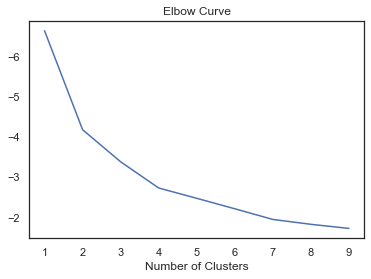

In [95]:
plt.plot(num_clusters, score)
plt.xlabel('Number of Clusters')
plt.title('Elbow Curve')
plt.gca().invert_yaxis()

Using the "elbow criterion" the number of clusters chosen should be 4. This is obviously debatable.

In [96]:
# set number of clusters
kclusters = 4

#london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering_fit)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 3, 3, 3, 3, 3, 0, 0])

In [97]:
# add clustering labels into our DF london_grouped_clustering
london_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)


In [98]:
london_grouped_clustering.head()

Cluster Labels           Neighborhood  Accessories Store  \
0               0   Barking and Dagenham                0.0   
1               0                  Brent                0.0   
2               0                  Brent                0.0   
3               3                Bromley                0.0   
4               3                Bromley                0.0   

   Afghan Restaurant  African Restaurant  American Restaurant  Antique Shop  \
0                0.0            0.000000                  0.0           0.0   
1                0.0            0.009615                  0.0           0.0   
2                0.0            0.009615                  0.0           0.0   
3                0.0            0.000000                  0.0           0.0   
4                0.0            0.000000                  0.0           0.0   

   Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0       0.0     0.0               0.0                     0.0     0.000000   
1       0.0     0.0               0.0                     0.0     0.028846   
2       0.0     0.0               0.0                     0.0     0.028846   
3       0.0     0.0               0.0                     0.0     0.000000   
4       0.0     0.0               0.0                     0.0     0.000000   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0    0.000000             0.000000          0.000000                 0.0   
1    0.019231             0.009615          0.009615                 0.0   
2    0.019231             0.009615          0.009615                 0.0   
3    0.000000             0.000000          0.000000                 0.0   
4    0.000000             0.000000          0.000000                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0          0.0            0.0   
1                    0.0                  0.0          0.0            0.0   
2                    0.0                  0.0          0.0            0.0   
3                    0.0                  0.0          0.0            0.0   
4                    0.0                  0.0          0.0            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.009615  0.009615    0.0              0.0   
3        0.0         0.0  0.000000  0.000000    0.0              0.0   
4        0.0         0.0  0.000000  0.000000    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.000000   
3       0.0          0.0         0.0           0.0        0.0  0.052632   
4       0.0          0.0         0.0           0.0        0.0  0.052632   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.019231  0.009615            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.000000  0.000000            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0             0.0      0.0              0.0       0.0   
1                   0.0             0.0      0.0              0.0       0.0   
2                   0.0             0.0      0.0              0.0       0.0   
3                   0.0             0.0      0.0              0.0       0.0   


#### Save File

In [50]:
london_grouped_clustering.to_csv("london_grouped_clustering_KMeans.csv")

#### Read File

In [ ]:
london_grouped_clustering=pd.read_csv("london_grouped_clustering_KMeans.csv")

I will now unpivot the data and create a new df to explore each cluster more easily.

In [99]:
# value_name is 'value' by default, but setting it here to make it clear
london_unpivot= pd.melt(london_grouped_clustering, 
                        id_vars=['Cluster Labels','Neighborhood','London_borough','latitude','longitude'
                                 ,'avg_rent','AVG_Rent_Scaled'],var_name='Venue',value_name='Freq')

In [100]:
london_unpivot.head()

Cluster Labels           Neighborhood         London_borough   latitude  \
0               0   Barking and Dagenham   Barking and Dagenham  51.572890   
1               0                  Brent                  Brent  51.506420   
2               0                  Brent                  Brent  51.562370   
3               3                Bromley                Bromley  51.452068   
4               3                Bromley                Bromley  51.426740   

   longitude  avg_rent  AVG_Rent_Scaled              Venue  Freq  
0   0.147528    318.75         0.016909  Accessories Store   0.0  
1  -0.127210    347.00         0.026095  Accessories Store   0.0  
2  -0.221310    457.00         0.061865  Accessories Store   0.0  
3   0.172230    307.00         0.013088  Accessories Store   0.0  
4  -0.055330    362.75         0.031217  Accessories Store   0.0

In [101]:
london_unpivot.shape

(79200, 9)

In [102]:
df_cluster = pd.DataFrame(london_unpivot.groupby('Cluster Labels')['latitude','longitude'].nunique())
df_cluster

latitude  longitude
Cluster Labels                     
0                     62         62
1                      2          2
2                     17         17
3                     96         96

OK what immediately draw our attention is the cluster "1" which has only two values, probably due to the outliers...

#### Cluster 1

Text(0.5, 1.0, 'Cluster 0 contains 62 points with an average weekly rent of: £359')

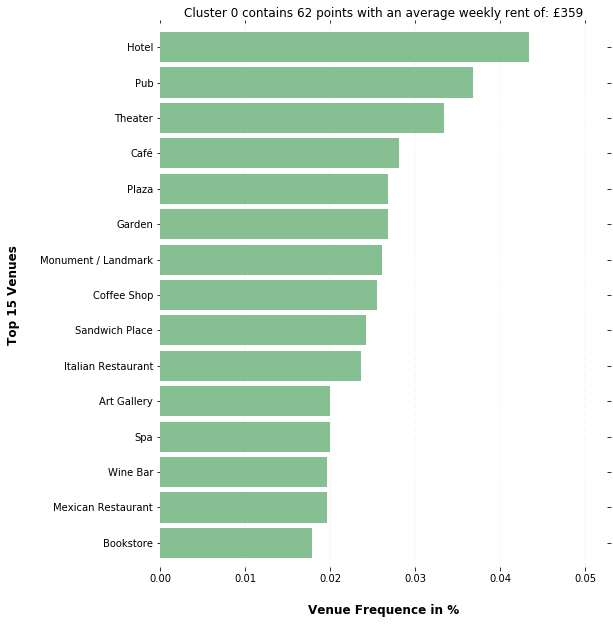

In [60]:
x = london_unpivot[london_unpivot["Cluster Labels"]==0].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==0]["avg_rent"].mean())
x_count=df_cluster.iloc[0]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 0 contains {x_count} points with an average weekly rent of: £{x_mean}")


#### Cluster 2

Text(0.5, 1.0, 'Cluster 1 contains 2 points with an average weekly rent of: £2727')

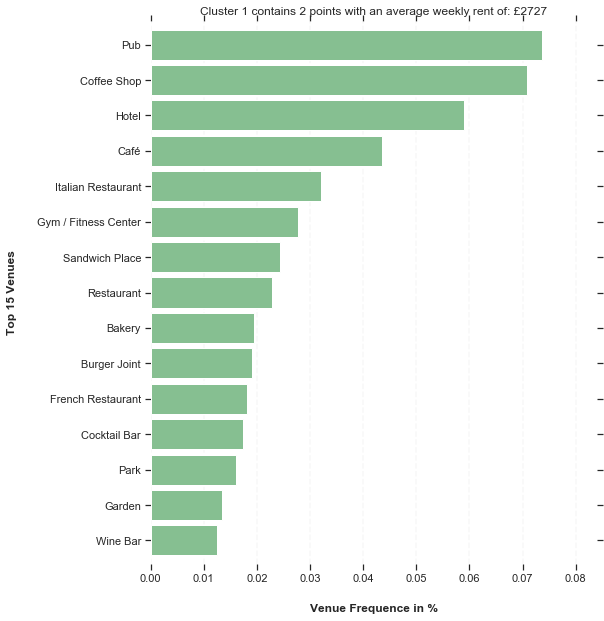

In [192]:
x = london_unpivot[london_unpivot["Cluster Labels"]==1].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==1]["avg_rent"].mean())
x_count=df_cluster.iloc[1]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 1 contains {x_count} points with an average weekly rent of: £{x_mean}")


#### Cluster 3

Text(0.5, 1.0, 'Cluster 2 contains 17 points with an average weekly rent of: £1155')

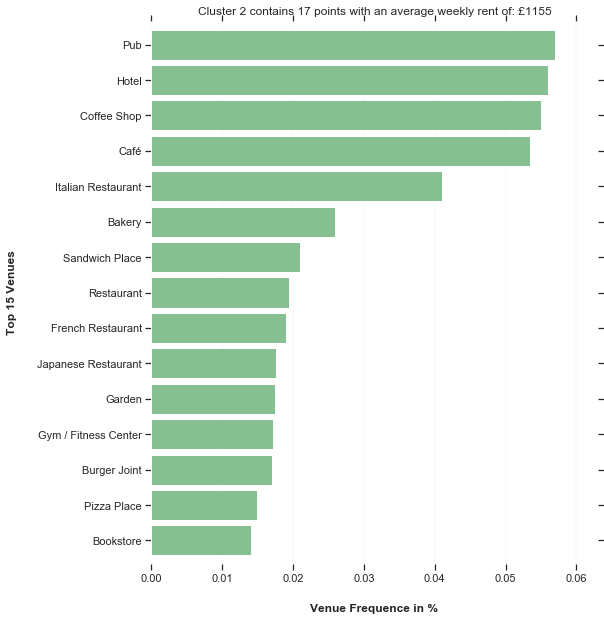

In [193]:
x = london_unpivot[london_unpivot["Cluster Labels"]==2].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==2]["avg_rent"].mean())
x_count=df_cluster.iloc[2]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 2 contains {x_count} points with an average weekly rent of: £{x_mean}")


#### Cluster 4

Text(0.5, 1.0, 'Cluster 3 contains 96 points with an average weekly rent of: £472')

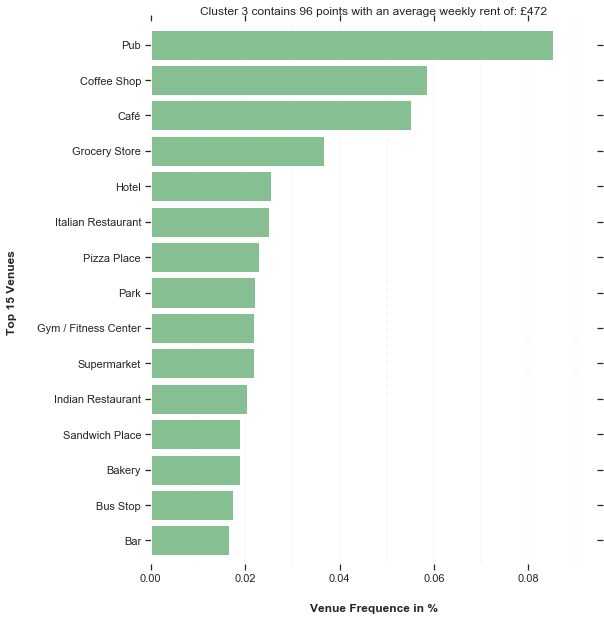

In [194]:
x = london_unpivot[london_unpivot["Cluster Labels"]==3].groupby('Venue')['Freq'].mean().sort_values().tail(15)
x_mean=int(london_unpivot[london_unpivot["Cluster Labels"]==3]["avg_rent"].mean())
x_count=df_cluster.iloc[3]['latitude']
ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Venue Frequence in %", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 15 Venues", labelpad=20, weight='bold', size=12)

# Set title
ax.set_title(f"Cluster 3 contains {x_count} points with an average weekly rent of: £{x_mean}")


After exploring our 4 clusters we can name them based on their most frequent venues as well as their avg weekly rents.

Cluster 0 is the most affordable in term of renting and seems to be a good place for going out    
as well as enjoying a walk in a park visiting galleries or tasting wines.

Cluster 1 has exorbitant renting price and has only two districts in its cluster.It is indeed caused by the outliers that we have already detected during the EDA part.

Cluster 2 is also quite expensive and has many hotels, pubs, cafes and restaurants the points of this clusters   are  likely to be located in the city centre.

Cluster 3 is a bit more expensive than cluster 0 but much cheaper than cluster 1 and 2, appart from the  
renting price cluster 3 is very simmilar to cluster 2.

According to their price and top venues I decided to name the 4 clusters as follows:  
**Cluster 0**: Quiet & Cheap  
**Cluster 1**: Exorbitant  
**Cluster 2**: High rent and best districts to go out   
**Cluster 3**: Affordable and good for going out   

In [105]:
london_grouped_clustering['Cluster Labels Desc']=london_grouped_clustering['Cluster Labels'].replace({0: 'Quiet & Cheap'
                                                     , 1: 'Exorbitant'
                                                     , 2: 'High rent and best districts to go out'
                                                     , 3: 'Affordable and good for going out'})

In [106]:
london_grouped_clustering.head()

Cluster Labels           Neighborhood  Accessories Store  \
0               0   Barking and Dagenham                0.0   
1               0                  Brent                0.0   
2               0                  Brent                0.0   
3               3                Bromley                0.0   
4               3                Bromley                0.0   

   Afghan Restaurant  African Restaurant  American Restaurant  Antique Shop  \
0                0.0            0.000000                  0.0           0.0   
1                0.0            0.009615                  0.0           0.0   
2                0.0            0.009615                  0.0           0.0   
3                0.0            0.000000                  0.0           0.0   
4                0.0            0.000000                  0.0           0.0   

   Aquarium  Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0       0.0     0.0               0.0                     0.0     0.000000   
1       0.0     0.0               0.0                     0.0     0.028846   
2       0.0     0.0               0.0                     0.0     0.028846   
3       0.0     0.0               0.0                     0.0     0.000000   
4       0.0     0.0               0.0                     0.0     0.000000   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0    0.000000             0.000000          0.000000                 0.0   
1    0.019231             0.009615          0.009615                 0.0   
2    0.019231             0.009615          0.009615                 0.0   
3    0.000000             0.000000          0.000000                 0.0   
4    0.000000             0.000000          0.000000                 0.0   

   Australian Restaurant  Austrian Restaurant  Auto Garage  Auto Workshop  \
0                    0.0                  0.0          0.0            0.0   
1                    0.0                  0.0          0.0            0.0   
2                    0.0                  0.0          0.0            0.0   
3                    0.0                  0.0          0.0            0.0   
4                    0.0                  0.0          0.0            0.0   

   BBQ Joint  Bagel Shop    Bakery       Bar  Beach  Bed & Breakfast  \
0        0.0         0.0  0.000000  0.000000    0.0              0.0   
1        0.0         0.0  0.009615  0.009615    0.0              0.0   
2        0.0         0.0  0.009615  0.009615    0.0              0.0   
3        0.0         0.0  0.000000  0.000000    0.0              0.0   
4        0.0         0.0  0.000000  0.000000    0.0              0.0   

   Beer Bar  Beer Garden  Beer Store  Betting Shop  Bike Shop    Bistro  \
0       0.0          0.0         0.0           0.0        0.0  0.000000   
1       0.0          0.0         0.0           0.0        0.0  0.000000   
2       0.0          0.0         0.0           0.0        0.0  0.000000   
3       0.0          0.0         0.0           0.0        0.0  0.052632   
4       0.0          0.0         0.0           0.0        0.0  0.052632   

   Boarding House  Bookstore  Boutique  Bowling Alley  Boxing Gym  Brasserie  \
0             0.0   0.000000  0.000000            0.0         0.0        0.0   
1             0.0   0.019231  0.009615            0.0         0.0        0.0   
2             0.0   0.019231  0.009615            0.0         0.0        0.0   
3             0.0   0.000000  0.000000            0.0         0.0        0.0   
4             0.0   0.000000  0.000000            0.0         0.0        0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  Building  \
0                   0.0             0.0      0.0              0.0       0.0   
1                   0.0             0.0      0.0              0.0       0.0   
2                   0.0             0.0      0.0              0.0       0.0   
3                   0.0             0.0      0.0              0.0       0.0   


In [107]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [108]:
lnd_geo = r'london_small.geojson'
lnd_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

lnd_map.choropleth(
    geo_data=lnd_geo,
    data=london_grouped_clustering,
    columns=['London_borough','avg_rent'],
    key_on='feature.properties.name',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average house Prices'
)
markers_colors = []
# add markers to the map
markers_colors = []
for lat, lon, cluster,Desc in zip(london_grouped_clustering['latitude']
                                  ,london_grouped_clustering['longitude']
                                  ,london_grouped_clustering['Cluster Labels']
                                 ,london_grouped_clustering['Cluster Labels Desc']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(Desc), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(lnd_map)
    
# display map
lnd_map

## Result

We came to the result that the most of the districts in central London and close to the centre are simillar in term of their venues, what really differentiates them is their renting price.
K-means algorithm has been heavilly influenced by the variable "avg_rent", we can clearly observe that one cluster contains all the districts of central London, one cluster contains the district of inner London while the last contains the districts of outer London.


### Discussion

As mentionned earlier K-mean is sensitive to outliers and this is clearly what has mostly influenced the clusters.
Things that can be considered to improve this project:
* Try other models such as K-medoids which is more robust to outlier than K-means because it minimizes a sum of general pairwise dissimilarities instead of a sum of squared Euclidean distances.
* Add other features such as crime rate, school rate...
* Drop the outlier records?
* Cap outliers data
* Transform outliers like transforming the rent price to percentile
* COmpare sales vs rents and figure out which district delivers better yields


### Conlusion

In this study, I analyzed the different districts of London based on the renting price and their venues.  
I've implemanted the k-means algorithm, some web scrapping and data annalysis tecniques learnt throughout the IBM Data Science certificate which was mainly taught by Dr Saeed Aghbozorgi and Dr Alex Aklson.

#### References

* https://en.wikipedia.org/wiki/K-means_clustering
* https://en.wikipedia.org/wiki/Elbow_method_(clustering)
* https://www.coursera.org/professional-certificates/ibm-data-science


#### Link to the project and data files
https://github.com/f-benoit/IBM-Data-Science/tree/master/London%20CLustering